In [362]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score,classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data=pd.read_csv(r"C:\Users\abhishekgh\Desktop\ExcelR\Titanic_train.csv")
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
test_data=pd.read_csv(r"C:\Users\abhishekgh\Desktop\ExcelR\Titanic_test.csv")
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [9]:
print(train_data.size)
print(test_data.size)

10692
4598


In [11]:
print(train_data.shape)
print(test_data.shape)

(891, 12)
(418, 11)


In [13]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [15]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [17]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [21]:
train_data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [23]:
train_data[train_data.duplicated]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


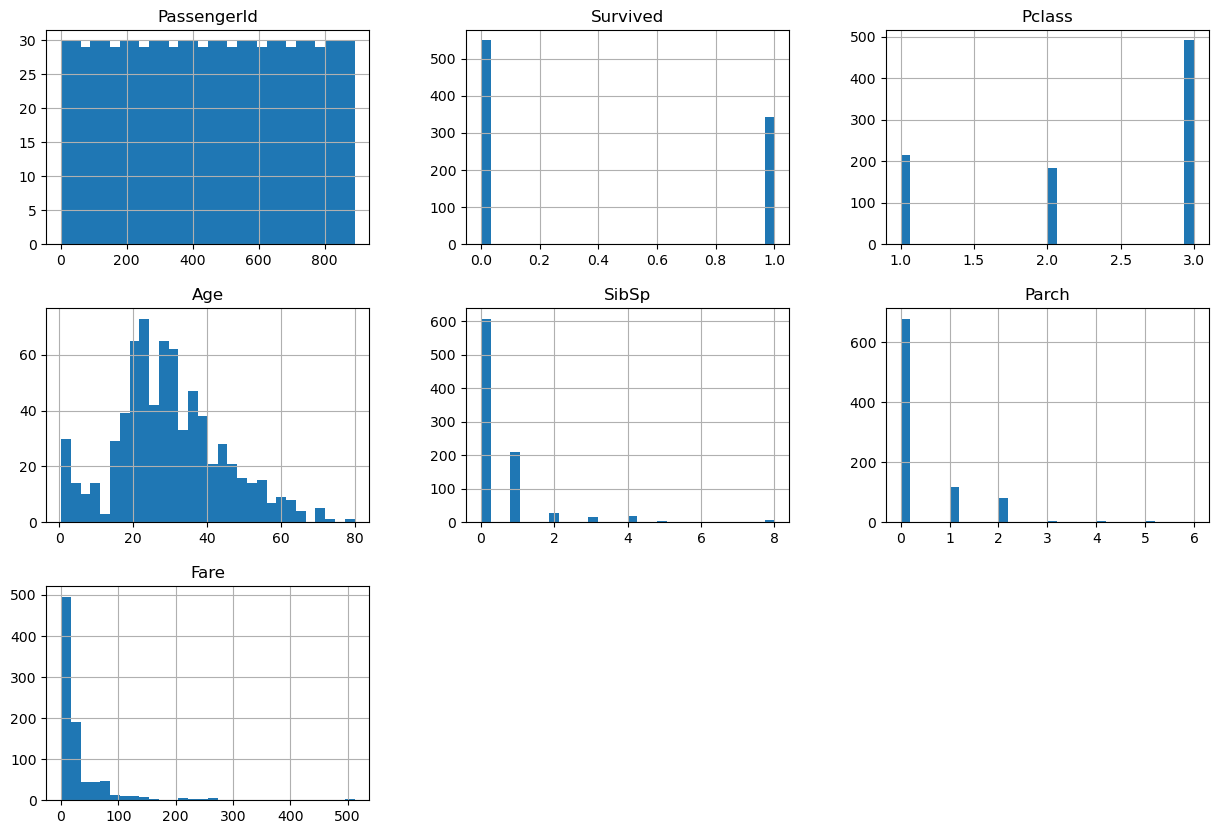

In [25]:
# Histogram
train_data.hist(bins=30, figsize=(15, 10))
plt.show()

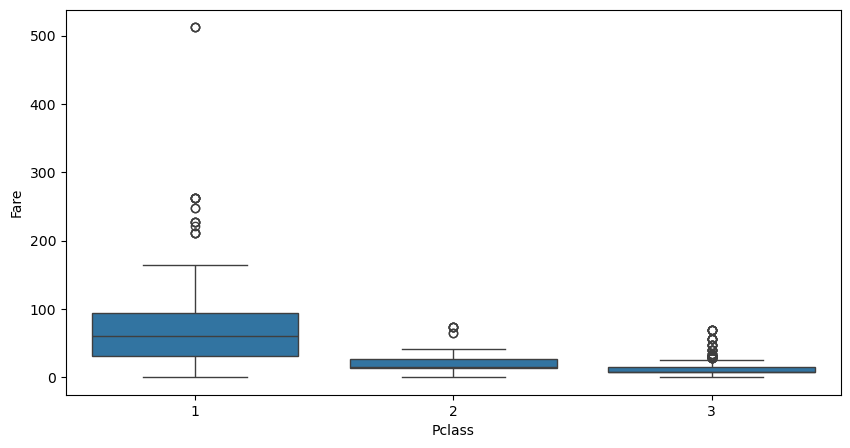

In [26]:
# Box plots
plt.figure(figsize=(10, 5))
sns.boxplot(x='Pclass', y='Fare', data=train_data)
plt.show()

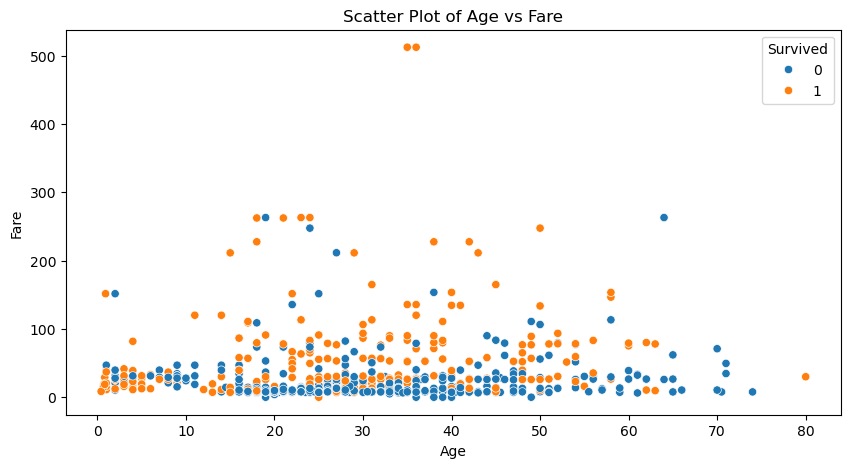

In [27]:
# Scatter plot
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=train_data)
plt.title('Scatter Plot of Age vs Fare')
plt.show()


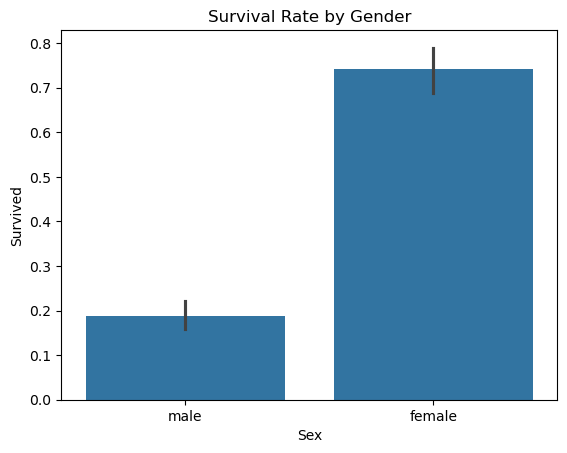

In [28]:
sns.barplot(x='Sex', y='Survived', data=train_data)
plt.title('Survival Rate by Gender')
plt.show()

In [29]:
features=train_data.drop('Survived',axis=1)
features

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [32]:
features.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [34]:
cat_col=[i for i in features.columns if features[i].dtypes=='O']
num_col=[i for i in features.columns if features[i].dtypes!='O']

In [36]:
features[cat_col]

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,NaN,S
887,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S
889,"Behr, Mr. Karl Howell",male,111369,C148,C


In [44]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OrdinalEncoder

In [46]:
ord_enco=make_pipeline(OrdinalEncoder())

In [48]:
trasformer=ColumnTransformer([('ord_enco',ord_enco,cat_col)])

In [52]:
trasformer.get_feature_names_out

<bound method ColumnTransformer.get_feature_names_out of ColumnTransformer(transformers=[('ord_enco',
                                 Pipeline(steps=[('ordinalencoder',
                                                  OrdinalEncoder())]),
                                 ['Name', 'Sex', 'Ticket', 'Cabin',
                                  'Embarked'])])>

In [54]:
df=pd.DataFrame(trasformer.fit_transform(features))

In [56]:
df

,0,1,2,3,4
0,108.0,1.0,523.0,NaN,2.0
1,190.0,0.0,596.0,81.0,0.0
2,353.0,0.0,669.0,NaN,2.0
3,272.0,0.0,49.0,55.0,2.0
4,15.0,1.0,472.0,NaN,2.0
...,...,...,...,...,...
886,548.0,1.0,101.0,NaN,2.0
887,303.0,0.0,14.0,30.0,2.0
888,413.0,0.0,675.0,NaN,2.0
889,81.0,1.0,8.0,60.0,0.0


In [68]:
simple_imput=SimpleImputer(missing_values=np.nan,strategy='most_frequent')

In [72]:
feature_train=pd.DataFrame(simple_imput.fit_transform(df))
feature_train

,0,1,2,3,4
0,108.0,1.0,523.0,47.0,2.0
1,190.0,0.0,596.0,81.0,0.0
2,353.0,0.0,669.0,47.0,2.0
3,272.0,0.0,49.0,55.0,2.0
4,15.0,1.0,472.0,47.0,2.0
...,...,...,...,...,...
886,548.0,1.0,101.0,47.0,2.0
887,303.0,0.0,14.0,30.0,2.0
888,413.0,0.0,675.0,47.0,2.0
889,81.0,1.0,8.0,60.0,0.0


In [78]:
features[num_col].isnull().sum()

PassengerId      0
Pclass           0
Age            177
SibSp            0
Parch            0
Fare             0
dtype: int64

In [80]:
simple_imput1=SimpleImputer(missing_values=np.nan,strategy='mean')

In [82]:
df1=pd.DataFrame(simple_imput1.fit_transform(features[num_col]))

In [84]:
df1

,0,1,2,3,4,5
0,1.0,3.0,22.000000,1.0,0.0,7.2500
1,2.0,1.0,38.000000,1.0,0.0,71.2833
2,3.0,3.0,26.000000,0.0,0.0,7.9250
3,4.0,1.0,35.000000,1.0,0.0,53.1000
4,5.0,3.0,35.000000,0.0,0.0,8.0500
...,...,...,...,...,...,...
886,887.0,2.0,27.000000,0.0,0.0,13.0000
887,888.0,1.0,19.000000,0.0,0.0,30.0000
888,889.0,3.0,29.699118,1.0,2.0,23.4500
889,890.0,1.0,26.000000,0.0,0.0,30.0000


In [195]:
std_scaler=StandardScaler()
df2=pd.DataFrame(std_scaler.fit_transform(df1))
df2

,0,1,2,3,4,5
0,-1.730108,0.827377,-0.592481,0.432793,-0.473674,-0.502445
1,-1.726220,-1.566107,0.638789,0.432793,-0.473674,0.786845
2,-1.722332,0.827377,-0.284663,-0.474545,-0.473674,-0.488854
3,-1.718444,-1.566107,0.407926,0.432793,-0.473674,0.420730
4,-1.714556,0.827377,0.407926,-0.474545,-0.473674,-0.486337
...,...,...,...,...,...,...
886,1.714556,-0.369365,-0.207709,-0.474545,-0.473674,-0.386671
887,1.718444,-1.566107,-0.823344,-0.474545,-0.473674,-0.044381
888,1.722332,0.827377,0.000000,0.432793,2.008933,-0.176263
889,1.726220,-1.566107,-0.284663,-0.474545,-0.473674,-0.044381


In [96]:
features1=pd.concat([feature_train,df2],axis=1,ignore_index=True)
features1

,0,1,2,3,4,5,6,7,8,9,10
0,108.0,1.0,523.0,47.0,2.0,-1.730108,0.827377,-0.592481,0.432793,-0.473674,-0.502445
1,190.0,0.0,596.0,81.0,0.0,-1.726220,-1.566107,0.638789,0.432793,-0.473674,0.786845
2,353.0,0.0,669.0,47.0,2.0,-1.722332,0.827377,-0.284663,-0.474545,-0.473674,-0.488854
3,272.0,0.0,49.0,55.0,2.0,-1.718444,-1.566107,0.407926,0.432793,-0.473674,0.420730
4,15.0,1.0,472.0,47.0,2.0,-1.714556,0.827377,0.407926,-0.474545,-0.473674,-0.486337
...,...,...,...,...,...,...,...,...,...,...,...
886,548.0,1.0,101.0,47.0,2.0,1.714556,-0.369365,-0.207709,-0.474545,-0.473674,-0.386671
887,303.0,0.0,14.0,30.0,2.0,1.718444,-1.566107,-0.823344,-0.474545,-0.473674,-0.044381
888,413.0,0.0,675.0,47.0,2.0,1.722332,0.827377,0.000000,0.432793,2.008933,-0.176263
889,81.0,1.0,8.0,60.0,0.0,1.726220,-1.566107,-0.284663,-0.474545,-0.473674,-0.044381


In [114]:
old_name= range(0,5)
new_name= cat_col
old_name1= range(5,11)
new_name1=num_col
features1=features1.rename(columns=dict(zip(old_name,new_name)))
features1=features1.rename(columns=dict(zip(old_name1,new_name1)))

In [110]:
features1

,Name,Sex,Ticket,Cabin,Embarked,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,108.0,1.0,523.0,47.0,2.0,-1.730108,0.827377,-0.592481,0.432793,-0.473674,-0.502445
1,190.0,0.0,596.0,81.0,0.0,-1.726220,-1.566107,0.638789,0.432793,-0.473674,0.786845
2,353.0,0.0,669.0,47.0,2.0,-1.722332,0.827377,-0.284663,-0.474545,-0.473674,-0.488854
3,272.0,0.0,49.0,55.0,2.0,-1.718444,-1.566107,0.407926,0.432793,-0.473674,0.420730
4,15.0,1.0,472.0,47.0,2.0,-1.714556,0.827377,0.407926,-0.474545,-0.473674,-0.486337
...,...,...,...,...,...,...,...,...,...,...,...
886,548.0,1.0,101.0,47.0,2.0,1.714556,-0.369365,-0.207709,-0.474545,-0.473674,-0.386671
887,303.0,0.0,14.0,30.0,2.0,1.718444,-1.566107,-0.823344,-0.474545,-0.473674,-0.044381
888,413.0,0.0,675.0,47.0,2.0,1.722332,0.827377,0.000000,0.432793,2.008933,-0.176263
889,81.0,1.0,8.0,60.0,0.0,1.726220,-1.566107,-0.284663,-0.474545,-0.473674,-0.044381


In [242]:
X=features1[['Name','Sex','Ticket','Cabin','Embarked','Pclass','Age','SibSp','Parch','Fare']]

In [246]:
X

,Name,Sex,Ticket,Cabin,Embarked,Pclass,Age,SibSp,Parch,Fare
0,108.0,1.0,523.0,47.0,2.0,0.827377,-0.592481,0.432793,-0.473674,-0.502445
1,190.0,0.0,596.0,81.0,0.0,-1.566107,0.638789,0.432793,-0.473674,0.786845
2,353.0,0.0,669.0,47.0,2.0,0.827377,-0.284663,-0.474545,-0.473674,-0.488854
3,272.0,0.0,49.0,55.0,2.0,-1.566107,0.407926,0.432793,-0.473674,0.420730
4,15.0,1.0,472.0,47.0,2.0,0.827377,0.407926,-0.474545,-0.473674,-0.486337
...,...,...,...,...,...,...,...,...,...,...
886,548.0,1.0,101.0,47.0,2.0,-0.369365,-0.207709,-0.474545,-0.473674,-0.386671
887,303.0,0.0,14.0,30.0,2.0,-1.566107,-0.823344,-0.474545,-0.473674,-0.044381
888,413.0,0.0,675.0,47.0,2.0,0.827377,0.000000,0.432793,2.008933,-0.176263
889,81.0,1.0,8.0,60.0,0.0,-1.566107,-0.284663,-0.474545,-0.473674,-0.044381


In [248]:
Y=train_data[['Survived']]

In [250]:
Y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [149]:
test_data=pd.read_csv(r"C:\Users\abhishekgh\Desktop\ExcelR\Titanic_test.csv")
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [157]:
test_data.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [171]:
cat_col1=[i for i in test_data.columns if test_data[i].dtypes=='O']
num_col1=[i for i in test_data.columns if test_data[i].dtypes!='O']

In [173]:
test_data[cat_col1]

,Name,Sex,Ticket,Cabin,Embarked
0,"Kelly, Mr. James",male,330911,NaN,Q
1,"Wilkes, Mrs. James (Ellen Needs)",female,363272,NaN,S
2,"Myles, Mr. Thomas Francis",male,240276,NaN,Q
3,"Wirz, Mr. Albert",male,315154,NaN,S
4,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,3101298,NaN,S
...,...,...,...,...,...
413,"Spector, Mr. Woolf",male,A.5. 3236,NaN,S
414,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
415,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,NaN,S
416,"Ware, Mr. Frederick",male,359309,NaN,S


In [167]:
ord_enco=make_pipeline(OrdinalEncoder())

In [175]:
trasformer=ColumnTransformer([('ord_enco',ord_enco,cat_col1)])

In [177]:
trasformer.get_feature_names_out


<bound method ColumnTransformer.get_feature_names_out of ColumnTransformer(transformers=[('ord_enco',
                                 Pipeline(steps=[('ordinalencoder',
                                                  OrdinalEncoder())]),
                                 ['Name', 'Sex', 'Ticket', 'Cabin',
                                  'Embarked'])])>

In [181]:
df_test=pd.DataFrame(trasformer.fit_transform(test_data))
df_test

,0,1,2,3,4
0,206.0,1.0,152.0,NaN,1.0
1,403.0,0.0,221.0,NaN,2.0
2,269.0,1.0,73.0,NaN,1.0
3,408.0,1.0,147.0,NaN,2.0
4,178.0,0.0,138.0,NaN,2.0
...,...,...,...,...,...
413,353.0,1.0,267.0,NaN,2.0
414,283.0,0.0,324.0,22.0,0.0
415,332.0,1.0,346.0,NaN,2.0
416,384.0,1.0,220.0,NaN,2.0


In [187]:
simple_imput2=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
feature_test=pd.DataFrame(simple_imput.fit_transform(df_test))
feature_test

,0,1,2,3,4
0,206.0,1.0,152.0,15.0,1.0
1,403.0,0.0,221.0,15.0,2.0
2,269.0,1.0,73.0,15.0,1.0
3,408.0,1.0,147.0,15.0,2.0
4,178.0,0.0,138.0,15.0,2.0
...,...,...,...,...,...
413,353.0,1.0,267.0,15.0,2.0
414,283.0,0.0,324.0,22.0,0.0
415,332.0,1.0,346.0,15.0,2.0
416,384.0,1.0,220.0,15.0,2.0


In [189]:
simple_imput3=SimpleImputer(missing_values=np.nan,strategy='mean')
df5=pd.DataFrame(simple_imput1.fit_transform(test_data[num_col]))
df5

,0,1,2,3,4,5
0,892.0,3.0,34.50000,0.0,0.0,7.8292
1,893.0,3.0,47.00000,1.0,0.0,7.0000
2,894.0,2.0,62.00000,0.0,0.0,9.6875
3,895.0,3.0,27.00000,0.0,0.0,8.6625
4,896.0,3.0,22.00000,1.0,1.0,12.2875
...,...,...,...,...,...,...
413,1305.0,3.0,30.27259,0.0,0.0,8.0500
414,1306.0,1.0,39.00000,0.0,0.0,108.9000
415,1307.0,3.0,38.50000,0.0,0.0,7.2500
416,1308.0,3.0,30.27259,0.0,0.0,8.0500


In [193]:
std_scaler=StandardScaler()
df6=pd.DataFrame(std_scaler.fit_transform(df5))
df6

,0,1,2,3,4,5
0,-1.727912,0.873482,0.334993,-0.499470,-0.400248,-0.498407
1,-1.719625,0.873482,1.325530,0.616992,-0.400248,-0.513274
2,-1.711337,-0.315819,2.514175,-0.499470,-0.400248,-0.465088
3,-1.703050,0.873482,-0.259330,-0.499470,-0.400248,-0.483466
4,-1.694763,0.873482,-0.655545,0.616992,0.619896,-0.418471
...,...,...,...,...,...,...
413,1.694763,0.873482,0.000000,-0.499470,-0.400248,-0.494448
414,1.703050,-1.505120,0.691586,-0.499470,-0.400248,1.313753
415,1.711337,0.873482,0.651965,-0.499470,-0.400248,-0.508792
416,1.719625,0.873482,0.000000,-0.499470,-0.400248,-0.494448


In [197]:
features3=pd.concat([feature_test,df6],axis=1,ignore_index=True)
features3

,0,1,2,3,4,5,6,7,8,9,10
0,206.0,1.0,152.0,15.0,1.0,-1.727912,0.873482,0.334993,-0.499470,-0.400248,-0.498407
1,403.0,0.0,221.0,15.0,2.0,-1.719625,0.873482,1.325530,0.616992,-0.400248,-0.513274
2,269.0,1.0,73.0,15.0,1.0,-1.711337,-0.315819,2.514175,-0.499470,-0.400248,-0.465088
3,408.0,1.0,147.0,15.0,2.0,-1.703050,0.873482,-0.259330,-0.499470,-0.400248,-0.483466
4,178.0,0.0,138.0,15.0,2.0,-1.694763,0.873482,-0.655545,0.616992,0.619896,-0.418471
...,...,...,...,...,...,...,...,...,...,...,...
413,353.0,1.0,267.0,15.0,2.0,1.694763,0.873482,0.000000,-0.499470,-0.400248,-0.494448
414,283.0,0.0,324.0,22.0,0.0,1.703050,-1.505120,0.691586,-0.499470,-0.400248,1.313753
415,332.0,1.0,346.0,15.0,2.0,1.711337,0.873482,0.651965,-0.499470,-0.400248,-0.508792
416,384.0,1.0,220.0,15.0,2.0,1.719625,0.873482,0.000000,-0.499470,-0.400248,-0.494448


In [201]:
old_name= range(0,5)
new_name= cat_col
old_name1= range(5,11)
new_name1=num_col
features3=features3.rename(columns=dict(zip(old_name,new_name)))
features3=features3.rename(columns=dict(zip(old_name1,new_name1)))

In [203]:
features3

,Name,Sex,Ticket,Cabin,Embarked,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,206.0,1.0,152.0,15.0,1.0,-1.727912,0.873482,0.334993,-0.499470,-0.400248,-0.498407
1,403.0,0.0,221.0,15.0,2.0,-1.719625,0.873482,1.325530,0.616992,-0.400248,-0.513274
2,269.0,1.0,73.0,15.0,1.0,-1.711337,-0.315819,2.514175,-0.499470,-0.400248,-0.465088
3,408.0,1.0,147.0,15.0,2.0,-1.703050,0.873482,-0.259330,-0.499470,-0.400248,-0.483466
4,178.0,0.0,138.0,15.0,2.0,-1.694763,0.873482,-0.655545,0.616992,0.619896,-0.418471
...,...,...,...,...,...,...,...,...,...,...,...
413,353.0,1.0,267.0,15.0,2.0,1.694763,0.873482,0.000000,-0.499470,-0.400248,-0.494448
414,283.0,0.0,324.0,22.0,0.0,1.703050,-1.505120,0.691586,-0.499470,-0.400248,1.313753
415,332.0,1.0,346.0,15.0,2.0,1.711337,0.873482,0.651965,-0.499470,-0.400248,-0.508792
416,384.0,1.0,220.0,15.0,2.0,1.719625,0.873482,0.000000,-0.499470,-0.400248,-0.494448


In [254]:
X_test=features3[['Name','Sex','Ticket','Cabin','Embarked','Pclass','Age','SibSp','Parch','Fare']]
X_test

,Name,Sex,Ticket,Cabin,Embarked,Pclass,Age,SibSp,Parch,Fare
0,206.0,1.0,152.0,15.0,1.0,0.873482,0.334993,-0.499470,-0.400248,-0.498407
1,403.0,0.0,221.0,15.0,2.0,0.873482,1.325530,0.616992,-0.400248,-0.513274
2,269.0,1.0,73.0,15.0,1.0,-0.315819,2.514175,-0.499470,-0.400248,-0.465088
3,408.0,1.0,147.0,15.0,2.0,0.873482,-0.259330,-0.499470,-0.400248,-0.483466
4,178.0,0.0,138.0,15.0,2.0,0.873482,-0.655545,0.616992,0.619896,-0.418471
...,...,...,...,...,...,...,...,...,...,...
413,353.0,1.0,267.0,15.0,2.0,0.873482,0.000000,-0.499470,-0.400248,-0.494448
414,283.0,0.0,324.0,22.0,0.0,-1.505120,0.691586,-0.499470,-0.400248,1.313753
415,332.0,1.0,346.0,15.0,2.0,0.873482,0.651965,-0.499470,-0.400248,-0.508792
416,384.0,1.0,220.0,15.0,2.0,0.873482,0.000000,-0.499470,-0.400248,-0.494448


## Building Predictive Models

In [324]:
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score

In [252]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.8,random_state=100)

In [266]:
y_test

,Survived
205,0
44,1
821,1
458,1
795,0
...,...
247,1
259,1
353,0
783,0


In [256]:
print(x_train.shape)
print(y_train.shape)
print(X_test.shape)

(712, 10)
(712, 1)
(418, 10)


## LightGBM Algorithm

In [274]:
import lightgbm as lgb

In [280]:
lgbm=lgb.LGBMClassifier(n_estimators=100,max_depth=3,max_bins=10,boosting_type='goss',top_rate=0.3,other_rate=0.2)

In [282]:
lgbm.fit(x_train,y_train)

[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 267, number of negative: 445
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001164 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 74
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 10
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.375000 -> initscore=-0.510826
[LightGBM] [Info] Start training from score -0.51

C:\Users\abhishekgh\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\abhishekgh\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


LGBMClassifier(boosting_type='goss', max_bins=10, max_depth=3, other_rate=0.2,
               top_rate=0.3)

In [290]:
lgbm_predict=lgbm.predict(x_test)
lgbm_predict

[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.


array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1], dtype=int64)

In [292]:
accuracy_score(y_test,lgbm_predict)

0.8379888268156425

In [364]:
## Classification Report
print(classification_report(y_test,lgbm_predict))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       104
           1       0.88      0.71      0.79        75

    accuracy                           0.84       179
   macro avg       0.85      0.82      0.83       179
weighted avg       0.84      0.84      0.83       179



## XGBoost Algorithm

In [129]:
import xgboost as xgb

In [211]:
xg_boost=xgb.XGBClassifier(learning_rate=0.1,gamma=10,reg_lambda=1,n_estimators=50,min_child_weight=2)                    

In [213]:
xg_boost.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=10, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [294]:
xgb_prd=xg_boost.predict(x_test)
xgb_prd

array([1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1])

In [296]:
accuracy_score(y_test,xgb_prd)

0.8100558659217877

In [366]:
##Clasclassification Report
print(classification_report(y_test,xgb_prd))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       104
           1       0.81      0.72      0.76        75

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



## Corss Validation

In [340]:
import warnings
warnings.filterwarnings('ignore')

##LG BOOST

In [342]:
scores=cross_val_score(lgbm,X,Y,scoring='accuracy',cv=5)
scores

[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000083 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 75
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 10
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.47

array([0.81005587, 0.81460674, 0.83707865, 0.79775281, 0.81460674])

In [344]:
cross_val_score(lgbm,X,Y,scoring='accuracy',cv=5).mean()

[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000075 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 75
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 10
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.47

0.8148201619484026

##XG BOOST

In [346]:
scores1 = cross_val_score(xg_boost, X, Y, cv=5, scoring='accuracy')
scores1

array([0.77094972, 0.80898876, 0.80898876, 0.79213483, 0.82022472])

In [326]:
cross_val_score(xg_boost,X,Y,scoring='accuracy',cv=5).mean()

0.8002573598644155

## Hyperparameter Tuning

In [348]:
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.5, 0.75, 1.0]
}

In [350]:
grid_search = GridSearchCV(estimator=xg_boost, param_grid=param_grid, 
                           scoring='accuracy', n_jobs=-1, cv=3, verbose=1)


In [352]:
grid_search.fit(X, Y)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=10,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=2,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=50,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.5, 0.75, 1.0]},
             scoring='accuracy', verbose=1)

In [354]:
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

Best parameters found:  {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.75}
Best cross-validation score:  0.8013468013468014


## Comparative Analysis:

## 1.	Compare the performance metrics (e.g., accuracy, precision, recall) of LightGBM and XGBoost models.

1. Accuracy

XGBoost: Known for high accuracy, especially with larger datasets. It can handle overfitting better due to its regularization techniques.

LightGBM: Generally achieves similar or better accuracy, particularly on large datasets due to its efficient handling of categorical features and faster training times.

2. Precision

XGBoost: Provides robust precision, often suitable for imbalanced datasets when tuned properly.

LightGBM: Can offer higher precision due to its leaf-wise growth strategy, which can capture more complex patterns.
    
3. Recall
    
XGBoost: Good recall, particularly when tuned for sensitivity in classification tasks.

LightGBM: Often shows improved recall, especially in scenarios with imbalanced classes, due to its efficient handling of samples.

4. F1 Score

Both models typically provide comparable F1 scores, balancing precision and recall. The choice of model might depend on the specific dataset and tuning.

## 2.	Visualize and interpret the results to identify the strengths and weaknesses of each algorithm.

##LightGBM

Strengths:

1.Faster training times due to its histogram-based approach.
    
2.Better handling of large datasets and categorical features.
    
3.Generally achieves higher accuracy with less computational power.
    
Weaknesses:

1.Can be more sensitive to overfitting if not properly tuned.
    
2.Might require more effort in hyperparameter tuning for optimal performance.
    
##XGBoost
    
Strengths:

1.Strong performance on a variety of datasets, particularly smaller ones.
    
2.Excellent regularization capabilities help prevent overfitting.
    
3.More mature library with extensive community support and documentation.
    
Weaknesses:

1.Slower training times compared to LightGBM, especially with large datasets.
    
2.Can be less efficient with memory usage